Students: Nu Uyen Thi PHAN, Manideep KANCHERLA, Mamadou Yaya Cherif DIALL

In [85]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xvf spark-2.4.4-bin-hadoop2.7.tgz
#!conda install -c conda-forge pyspark=2.4.4
!pip install -q findspark

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [86]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [87]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

### **Connect to drive to get files**

In [88]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
train_positive_ex1 = np.fromfile('/content/drive/My Drive/DS/exp1-train-400pos.bin', dtype=np.float32).reshape([400,5,768])
train_negative_ex1 = np.fromfile('/content/drive/My Drive/DS/exp1-train-2000neg.bin', dtype=np.float32).reshape([2000,5,768])
train_positive_ex2 = np.fromfile('/content/drive/My Drive/DS/exp2-train-400pos.bin', dtype=np.float32).reshape([400,5,768])
train_negative_ex2 = np.fromfile('/content/drive/My Drive/DS/exp2-train-2000neg.bin', dtype=np.float32).reshape([2000,5,768])


print(train_positive_ex1.shape)
print(train_negative_ex1.shape)
print(train_positive_ex2.shape)
print(train_negative_ex2.shape)

(400, 5, 768)
(2000, 5, 768)
(400, 5, 768)
(2000, 5, 768)


### **Plot data**

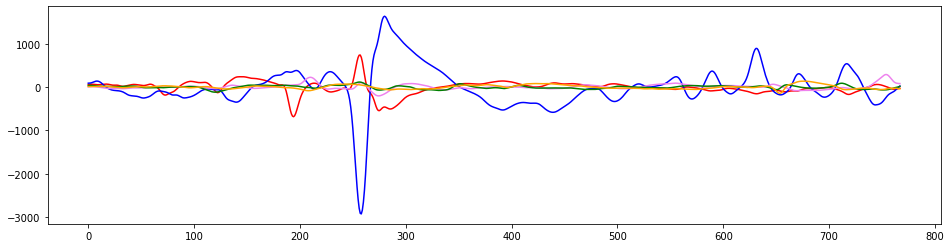

In [90]:
# cas positive ex1
y = train_positive_ex1[1][0]
y2 = train_positive_ex1[1][1]
y3 = train_positive_ex1[1][2]
y4 = train_positive_ex1[1][3]
y5 = train_positive_ex1[1][4]
# Plot lists and show them
plt.figure(1, figsize=(16, 4)) 
plt.plot(y, 'red')
plt.plot(y2, 'blue')
plt.plot(y3, 'violet')
plt.plot(y4, 'green')
plt.plot(y5, 'orange')
plt.show()


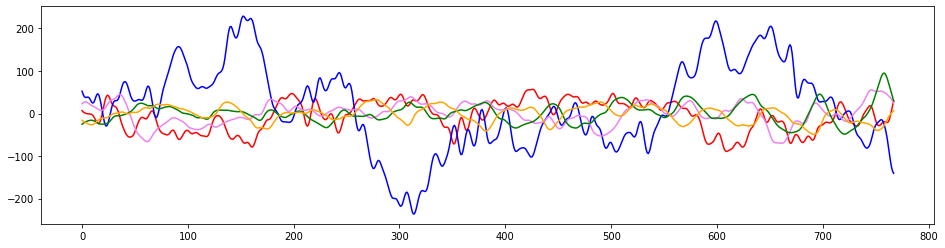

In [91]:
# cas negative ex1
y = train_negative_ex1[0][0]
y2 = train_negative_ex1[0][1]
y3 = train_negative_ex1[0][2]
y4 = train_negative_ex1[0][3]
y5 = train_negative_ex1[0][4]
# Plot lists and show them
plt.figure(1, figsize=(16, 4)) 
plt.plot(y, 'red')
plt.plot(y2, 'blue')
plt.plot(y3, 'violet')
plt.plot(y4, 'green')
plt.plot(y5, 'orange')
plt.show()


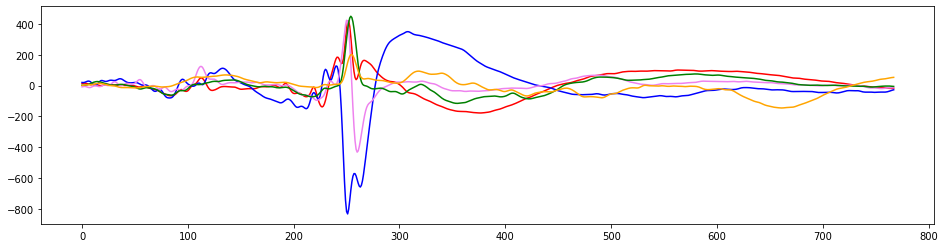

In [92]:
# cas positive ex2
y = train_positive_ex2[1][0]
y2 = train_positive_ex2[1][1]
y3 = train_positive_ex2[1][2]
y4 = train_positive_ex2[1][3]
y5 = train_positive_ex2[1][4]
# Plot lists and show them
plt.figure(1, figsize=(16, 4)) 
plt.plot(y, 'red')
plt.plot(y2, 'blue')
plt.plot(y3, 'violet')
plt.plot(y4, 'green')
plt.plot(y5, 'orange')
plt.show()

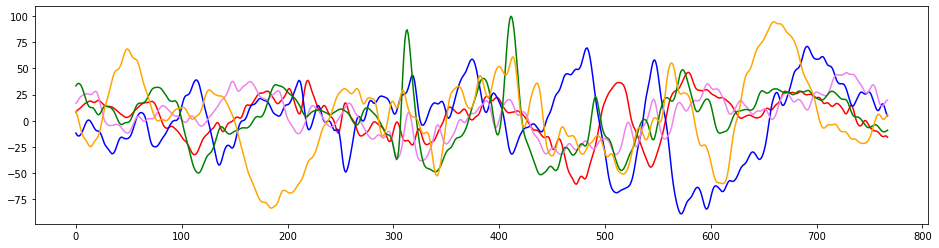

In [93]:
# cas negative ex2
y = train_negative_ex2[0][0]
y2 = train_negative_ex2[0][1]
y3 = train_negative_ex2[0][2]
y4 = train_negative_ex2[0][3]
y5 = train_negative_ex2[0][4]
# Plot lists and show them
plt.figure(1, figsize=(16, 4)) 
plt.plot(y, 'red')
plt.plot(y2, 'blue')
plt.plot(y3, 'violet')
plt.plot(y4, 'green')
plt.plot(y5, 'orange')
plt.show()

### **Test data**

In [94]:
test_data = np.fromfile('/content/drive/My Drive/DS/exp12-test-1200.bin', dtype=np.float32).reshape([1200, 5, 768])
test_data.shape

(1200, 5, 768)

Reshape test data from 3 dimensions to 2 dimensions

In [95]:
test_data = test_data.reshape(1200,5*768)
test_data.shape

(1200, 3840)

### **Train data**

Concatenate 4 files datasets pour create train data

In [96]:
train_data = np.concatenate([train_positive_ex1, train_positive_ex2, train_negative_ex1, train_negative_ex2])
train_data.shape

(4800, 5, 768)

Reshape train data from 3 dimensions to 2 dimensions

In [97]:
train_data = train_data.reshape(4800,5*768)
train_data.shape

(4800, 3840)

Get labels of all samples

In [98]:
train_negative_labels = np.zeros((len(train_negative_ex1) + len(train_negative_ex2),), dtype=int)

train_positive_labels = np.ones((len(train_positive_ex1) + len(train_positive_ex2),), dtype=int)
labels = np.concatenate([train_positive_labels, train_negative_labels])
labels.shape

(4800,)

### **PCA for training data and test data** 

In [99]:
# from sklearn.preprocessing import StandardScaler
# X_sca = StandardScaler()
# X_train = X_sca.fit_transform(train_data)
# X_test = X_sca.transform(test_data)


In [100]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=None)
# pca.fit_transform(X_train)
# explained_variance_ratio = pca.explained_variance_ratio_
# print (explained_variance_ratio)

[4.1192733e-02 3.1761829e-02 2.7040564e-02 ... 1.9509098e-15 1.4911506e-15
 1.1800970e-15]


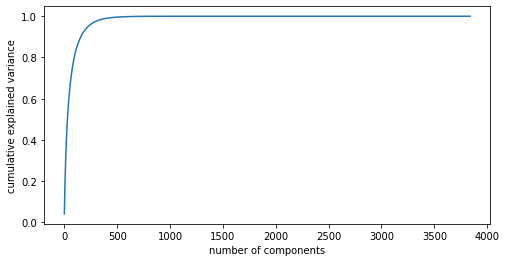

In [101]:
# plt.figure(1, figsize=(8, 4)) 
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

In [102]:
# pca = PCA(n_components=500)
# train_data = pca.fit_transform(X_train)
# test_data = pca.transform(X_test)


In [103]:
# print("new shape:   ", train_data.shape) 
# print("new shape:   ", test_data.shape) 

### **Classification**

Import librairies

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from  sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_sm, y_sm = smote.fit_resample(train_data, labels)
print(x_sm.shape, y_sm.shape, np.count_nonzero(y_sm== 0))

(8000, 3840) (8000,) 4000


In [106]:
# from imblearn.combine import SMOTEENN
# enn = SMOTEENN()
# x_enn, y_enn = enn.fit_resample(train_data, labels)

# print(x_enn.shape, y_enn.shape)

In [107]:
# from imblearn.combine import SMOTETomek
# stomek = SMOTETomek (random_state=0)
# x_stomek, y_stomek = stomek.fit_resample(train_data, labels)
# # x_stomek.shape
# # y_stomek.shape

In [108]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(train_data, labels)
print(x_ros.shape, y_ros.shape, np.count_nonzero(y_ros== 0))

(8000, 3840) (8000,) 4000


In [109]:
from imblearn.over_sampling import ADASYN
x_ad, y_ad = ADASYN().fit_resample(train_data, labels)
print(x_ad.shape, y_ad.shape, np.count_nonzero(y_ad== 0))


(8005, 3840) (8005,) 4000


In [110]:
from imblearn.under_sampling import ClusterCentroids 

cc = ClusterCentroids()

x_res, y_res = cc.fit_resample(train_data, labels)

print(x_res.shape, y_res.shape, np.count_nonzero(y_res== 0))

(1600, 3840) (1600,) 800


In [111]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_rus, y_rus = rus.fit_resample(train_data, labels)
print(x_rus.shape, y_rus.shape, np.count_nonzero(y_rus== 0))

(1600, 3840) (1600,) 800


### **Concatenate resampling**

In [112]:
#SMOTE + ADASYN + RUS
sar_train = np.concatenate((x_sm,x_ad, x_rus), axis=0) 
sar_label = np.concatenate((y_sm,y_ad, y_rus), axis=0)

In [113]:
#SMOTE + ADASYN + CC
sac_train = np.concatenate((x_sm,x_ad, x_res), axis=0) 
sac_label = np.concatenate((y_sm,y_ad, y_res), axis=0)

In [114]:
#SMOTE + ADASYN + RUS
new_train = np.concatenate((x_sm,x_ad, x_rus, x_res), axis=0) 
new_label = np.concatenate((y_sm,y_ad, y_rus, y_res), axis=0)

In [115]:
#SVC - ROS (Model 1)
import time
start = time.time()
model1 = RandomForestClassifier()


model1.fit(new_train, new_label)
y_pred1=model1.predict(test_data)

end = time.time()
print(end - start, "seconds")

136.71389055252075 seconds


In [116]:
#RF - SMOTE, ADASYN, RUS (Model 2)
import time
start = time.time()
model2 = RandomForestClassifier()

model2.fit(sar_train, sar_label)
y_pred2=model2.predict(test_data)

end = time.time()
print(end - start, "seconds")

126.9608383178711 seconds


In [117]:
#ETC - SMOTE, ADASYN, CC (Model 3)
import time
start = time.time()
model3 = ExtraTreesClassifier()

model3.fit(sac_train, sac_label)
y_pred3=model3.predict(test_data)

end = time.time()
print(end - start, "seconds")

28.806397438049316 seconds


In [118]:
#RF - SMOTE, ADASYN, CC (Model 4)
import time
start = time.time()
model4 = RandomForestClassifier()

model4.fit(sac_train, sac_label)
y_pred4=model4.predict(test_data)

end = time.time()
print(end - start, "seconds")

128.03421711921692 seconds


In [119]:
#SVC - ROS (Model 5)
import time
start = time.time()
model5 = SVC()

model5.fit(x_ros, y_ros)
y_pred5=model5.predict(test_data)

end = time.time()
print(end - start, "seconds")

69.89812207221985 seconds


In [120]:
count_test1 = np.count_nonzero(y_pred1 == 0)
print(count_test1)

count_test2 = np.count_nonzero(y_pred2 == 0)
print(count_test2)

count_test3 = np.count_nonzero(y_pred3== 0)
print(count_test3)

count_test4 = np.count_nonzero(y_pred4== 0)
print(count_test4)

count_test5 = np.count_nonzero(y_pred5== 0)
print(count_test5)

1008
1009
1005
1007
1017


### **Create file submission**

In [121]:
import pandas as pd
index_output = [x for x in range(1200)]
output = pd.DataFrame({'Id': index_output, 'Outcome': y_pred1})
output.to_csv('submission.csv', index=False)
file = open("submission.csv")



In [122]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>